For the bmi_data.xlsx dataset provided, 

- take the even-numbered subjects and fit the BMI Index distribution with using an exponential family where the sufficient statistic vector is composed of powers of the BMI Index.
- After fitting the different exponential families, plot the histogram of the odd-numbered subjects. Up to what power of the BMI Index does it seem reasonable to include in our exponential family model based on the deviation from the histogram of odd-numbered subjects?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy import integrate


In [2]:
bmi_data = pd.read_excel('bmi_data.xlsx')
bmi_data

,Gender,Height,Weight,BMI,Number
0,Male,198,50,12.753801,1
1,Female,198,50,12.753801,2
2,Female,196,50,13.015410,3
3,Female,190,50,13.850416,4
4,Male,190,50,13.850416,5
...,...,...,...,...,...
495,Female,140,146,74.489796,496
496,Male,140,146,74.489796,497
497,Male,145,160,76.099881,498
498,Male,140,152,77.551020,499


<BarContainer object of 20 artists>

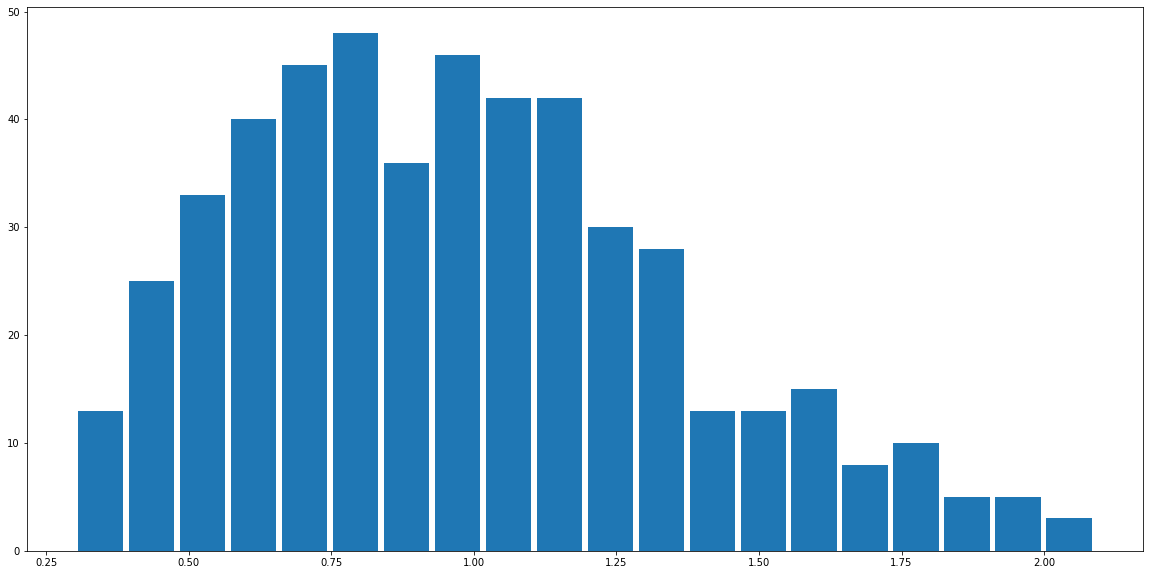

In [3]:
freqs, bins = np.histogram(bmi_data["BMI"], bins=20)
bmi_median = bmi_data["BMI"].median()
bmi_data["BMI"] = bmi_data["BMI"] / (bmi_median)
bins = bins / (bmi_median)


plt.figure(figsize=(20,10))
plt.bar(bins[:-1], freqs,width=0.08)

In [4]:
#take the even-numbered subjects
evens = bmi_data.loc[bmi_data["Number"] % 2 ==0]
odds = bmi_data.loc[bmi_data["Number"] % 2 !=0]

evens_bmi = pd.DataFrame(evens.loc[:,"BMI"])
odds_bmi = pd.DataFrame(odds.loc[:,"BMI"])

In [5]:
#take the even-numbered subjects and fit the BMI Index distribution with using an exponential family
#where the sufficient statistic vector is composed of powers of the BMI Index
#create a grid of 10 values
for i in range(2,9):
    evens_bmi['BMI_'+ str(i)] = evens_bmi['BMI'] ** i
    
evens_bmi 

,BMI,BMI_2,BMI_3,BMI_4,BMI_5,BMI_6,BMI_7,BMI_8
1,0.345099,0.119093,0.041099,0.014183,0.004895,0.001689,0.000583,0.000201
3,0.374772,0.140454,0.052638,0.019727,0.007393,0.002771,0.001038,0.000389
5,0.392268,0.153874,0.060360,0.023677,0.009288,0.003643,0.001429,0.000561
7,0.403991,0.163209,0.065935,0.026637,0.010761,0.004347,0.001756,0.000710
9,0.411116,0.169016,0.069485,0.028566,0.011744,0.004828,0.001985,0.000816
...,...,...,...,...,...,...,...,...
491,1.946264,3.787944,7.372341,14.348522,27.926016,54.351405,105.782194,205.880098
493,1.974167,3.897336,7.693994,15.189231,29.986084,59.197545,116.865857,230.712751
495,2.015583,4.062576,8.188461,16.504527,33.266249,67.050899,135.146678,272.399398
497,2.059150,4.240098,8.730998,17.978433,37.020289,76.230325,156.969665,323.224070


In [6]:
n = len(evens_bmi['BMI'])
suff_stats = np.array(evens_bmi.mean())
suff_stats

array([ 1.02366608,  1.19126353,  1.54307988,  2.18098592,  3.30657561,
        5.30197855,  8.88940531, 15.44301399])

In [7]:
def psi_func(alphas):
    
    f = lambda x: np.exp(sum([alpha * x ** (i+1) for i,alpha in enumerate(alphas)]) )
    integ_val = integrate.quad(f, 0.3, 2.2)[0]
    psi_val = np.log(integ_val)
    
    return psi_val

def exp_family_negative_loglik(alphas, n , y_bar):
    
    f = lambda x: np.exp(sum([alpha * x ** (i+1) for i,alpha in enumerate(alphas)]) )
    integ_val = integrate.quad(f, 0.3, 2.2)[0] 
    psi = np.log(integ_val)
    loglik = n * ( sum([alpha * y_bar[i] for i,alpha in enumerate(alphas)])  - psi)
    
    return -loglik


In [8]:
theta_hat_1 = minimize(lambda theta: exp_family_negative_loglik(theta, n, suff_stats[:1]),np.zeros(1),method='L-BFGS-B')['x']

theta_hat_2 = minimize(lambda theta: exp_family_negative_loglik(theta, n, suff_stats[:2]), np.zeros(2),method='L-BFGS-B')['x']


theta_hat_3 = minimize(lambda theta: exp_family_negative_loglik(theta, n, suff_stats[:3]), np.zeros(3),method='L-BFGS-B')['x']


theta_hat_4 = minimize(lambda theta: exp_family_negative_loglik(theta, n, suff_stats[:4]),np.zeros(4),method='L-BFGS-B')['x']


theta_hat_5 = minimize(lambda theta: exp_family_negative_loglik(theta, n, suff_stats[:5]),
                      np.zeros(5),method='L-BFGS-B')['x']



theta_hat_6 = minimize(lambda theta: exp_family_negative_loglik(theta, n,
                                                                      suff_stats[:6]),
                      np.zeros(6),method='L-BFGS-B')['x']

theta_hat_7 = minimize(lambda theta: exp_family_negative_loglik(theta, n,
                                                                      suff_stats[:7]),
                      np.zeros(7),method='L-BFGS-B')['x']

theta_hat_8 = minimize(lambda theta: exp_family_negative_loglik(theta, n,
                                                                      suff_stats[:8]),
                      np.zeros(8),method='L-BFGS-B')['x']


pdf_1 = lambda df: np.exp((np.dot(df, theta_hat_1) - psi_func(theta_hat_1)))

pdf_2 = lambda df: np.exp((np.dot(df, theta_hat_2) - psi_func(theta_hat_2)))

pdf_3 = lambda df: np.exp((np.dot(df, theta_hat_3) - psi_func(theta_hat_3)))

pdf_4 = lambda df: np.exp((np.dot(df, theta_hat_4) - psi_func(theta_hat_4)))

pdf_5 = lambda df: np.exp((np.dot(df, theta_hat_5) - psi_func(theta_hat_5)))

pdf_6 = lambda df: np.exp((np.dot(df, theta_hat_6) - psi_func(theta_hat_6)))

pdf_7 = lambda df: np.exp((np.dot(df, theta_hat_7) - psi_func(theta_hat_7)))

pdf_8 = lambda df: np.exp((np.dot(df, theta_hat_8) - psi_func(theta_hat_8)))

In [9]:
BMI_grid = np.linspace(0.3,2.2, 200)
x_grid = pd.DataFrame({'BMI':BMI_grid, 
                       'BMI_2':BMI_grid ** 2,
                       'BMI_3':BMI_grid ** 3,
                       'BMI_4':BMI_grid ** 4,
                       'BMI_5':BMI_grid ** 5,
                       'BMI_6':BMI_grid ** 6,
                       'BMI_7':BMI_grid ** 7,
                       'BMI_8':BMI_grid ** 8,
                       'BMI_9':BMI_grid ** 9,
                      })

In [10]:
pdf_vals_1p = x_grid.iloc[:, 0:1].apply(pdf_1, axis=1)
pdf_vals_2p = x_grid.iloc[:, 0:2].apply(pdf_2, axis=1)
pdf_vals_3p = x_grid.iloc[:, 0:3].apply(pdf_3, axis=1)
pdf_vals_4p = x_grid.iloc[:, 0:4].apply(pdf_4, axis=1)
pdf_vals_5p = x_grid.iloc[:, 0:5].apply(pdf_5, axis=1)
pdf_vals_6p = x_grid.iloc[:, 0:6].apply(pdf_6, axis=1)
pdf_vals_7p = x_grid.iloc[:, 0:7].apply(pdf_7, axis=1)
pdf_vals_8p = x_grid.iloc[:, 0:8].apply(pdf_8, axis=1)


pdf_vals_7p

0      0.144923
1      0.155905
2      0.167496
3      0.179709
4      0.192553
         ...   
195    0.039585
196    0.037765
197    0.036032
198    0.034386
199    0.032823
Length: 200, dtype: float64

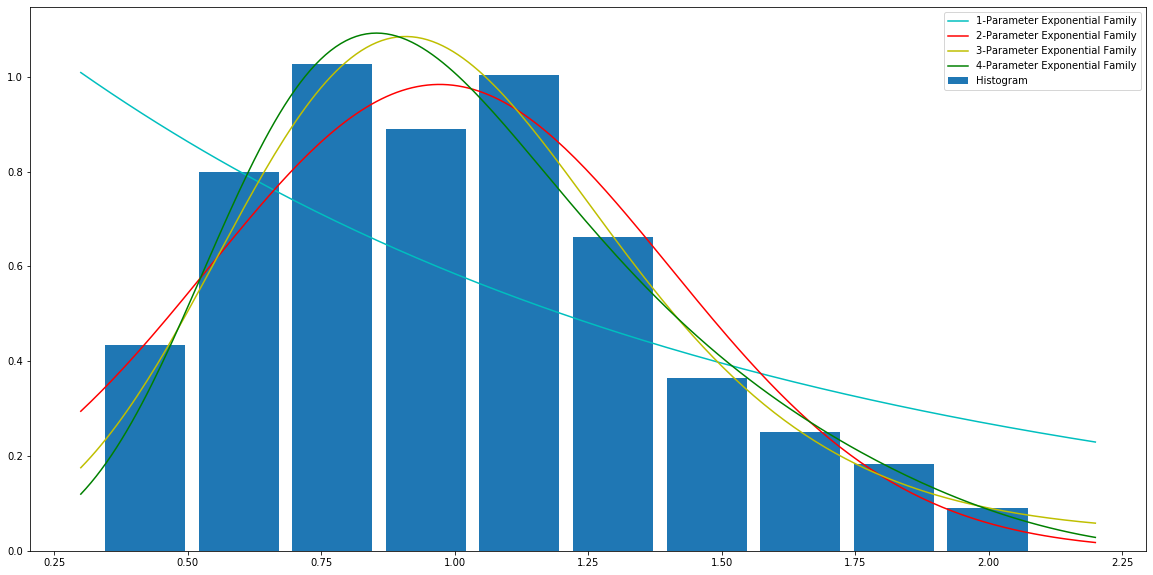

In [11]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
ax.plot(BMI_grid, pdf_vals_1p, '-c')
ax.plot(BMI_grid, pdf_vals_2p, '-r')
ax.plot(BMI_grid, pdf_vals_3p, '-y')
ax.plot(BMI_grid, pdf_vals_4p, '-g')

plt.hist(odds_bmi["BMI"], width=0.15, density=True)

ax.legend(['1-Parameter Exponential Family','2-Parameter Exponential Family',
           '3-Parameter Exponential Family', '4-Parameter Exponential Family',
          'Histogram'])


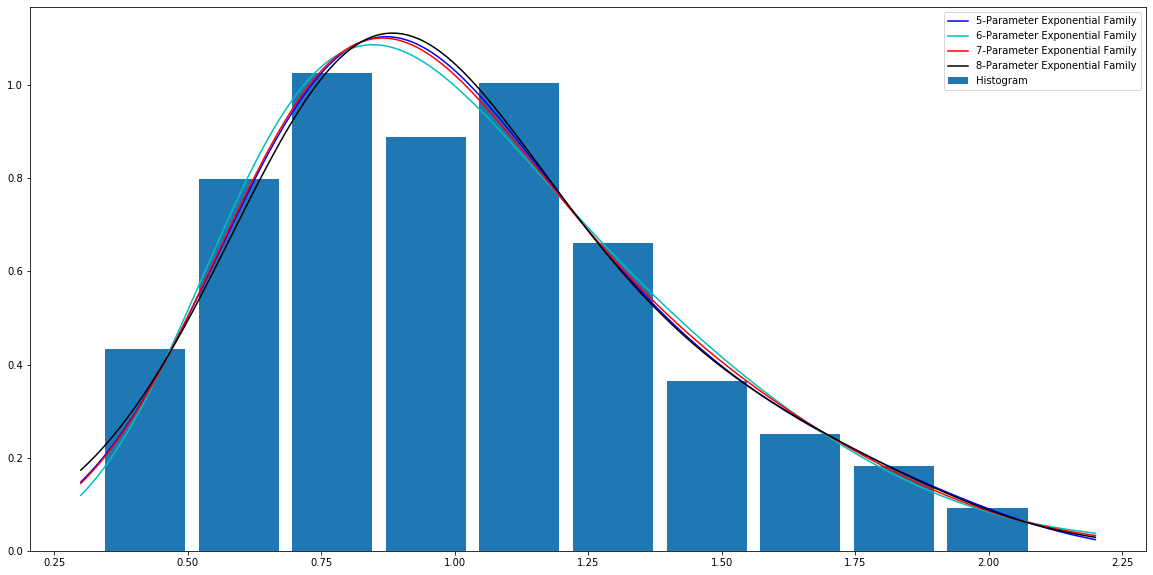

In [13]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
ax.plot(BMI_grid, pdf_vals_5p, '-b')
ax.plot(BMI_grid, pdf_vals_6p, '-c')
ax.plot(BMI_grid, pdf_vals_7p, '-r')
ax.plot(BMI_grid, pdf_vals_8p, '-k')
plt.hist(odds_bmi["BMI"], width=0.15, density=True)
ax.legend(['5-Parameter Exponential Family', '6-Parameter Exponential Family',
           '7-Parameter Exponential Family','8-Parameter Exponential Family','Histogram'])


As we can observe in the previous histograms the model with one parameter can not catch the histogram trend, the model with 2 parameters looks like a normal and our histogram is skweded, from 3 parameters to the rest we can observe that we catch this skweded form, from 5 to 8 parameters are very similar so we stop looking foward.

And answering the question up to what power of the BMI Index does it seem reasonable to include in our exponential family model based on the deviation from the histogram of odd-numbered subjects, we as a team conclude that 4p is the right one, but 3 is also a good one, maybe mathematicaly computing the correctness of each model can untie 